In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings




In [ ]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
#df = pd.read_csv('car data.csv')

In [ ]:
df = pd.read_csv("/content/car data.csv")

df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#  **Data Exploration and Cleaning**

In [ ]:
# Checking for Missing Values and Removing duplicates

df.isnull().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# Checking the Statistics of the Dataset

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Checking data types
print(df.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [ ]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


In [ ]:
# Dropping non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Computing correlation matrix
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.234369      -0.053563   -0.525714 -0.181639
Selling_Price  0.234369       1.000000       0.876378    0.028566 -0.087880
Present_Price -0.053563       0.876378       1.000000    0.205253  0.009947
Kms_Driven    -0.525714       0.028566       0.205253    1.000000  0.089367
Owner         -0.181639      -0.087880       0.009947    0.089367  1.000000


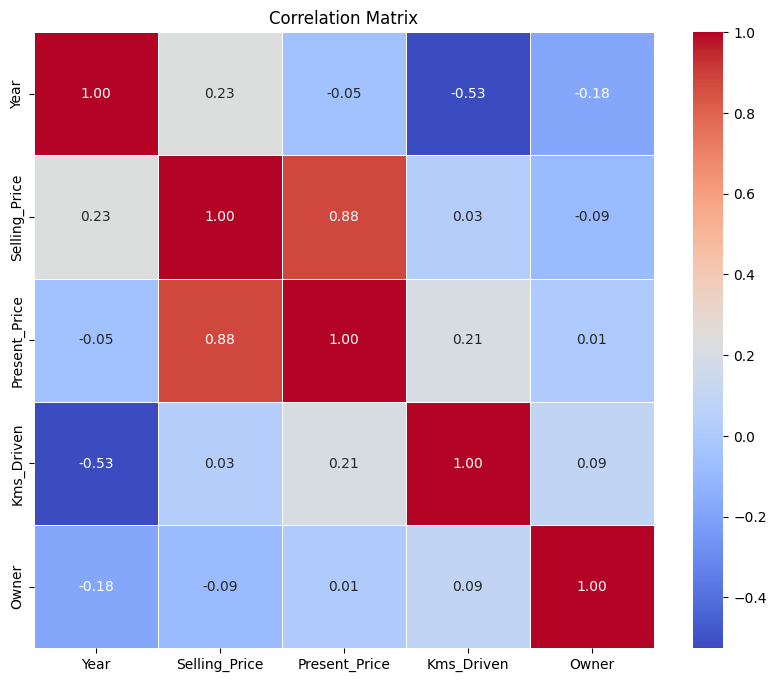

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Year vs. Selling_Price:

The correlation between the Year of the car and its Selling Price is a positive, but not very strong (correlation coefficient of 0.236). This shows that newer cars might have slightly higher selling prices.

Present_Price vs. Selling_Price:

The correlation between the Present Price of the car and its Selling Price (correlation coefficient of 0.879) is a strong positive correlation. It shows that as the present price of the car grows, its selling price will likely grow significantly.

Driven_kms vs. Selling_Price:

The correlation between the number of kilometers driven and the Selling Price of the car (correlation coefficient of 0.029) is a very weak positive correlation. It suggests that there is almost no relationship between the distance driven and the selling price.

Owner vs. Selling_Price:

The correlation between the number of owners the car has had and its Selling Price (correlation coefficient of -0.088) is a weak negative. This shows that cars with fewer owners will likely have slightly higher selling prices, although the effect is not very strong.

Driven_kms vs. Year:

The correlation between the number of kilometers driven and the Year of the car (correlation coefficient of -0.524) is a moderately negative. This shows that older cars will likely have been driven more, which is expected.

Year vs. Owner:

There is a weak negative correlation between the Year of the car and the number of Owners it has had (correlation coefficient of -0.182). This suggests that older cars may have had more owners, which is also expected.

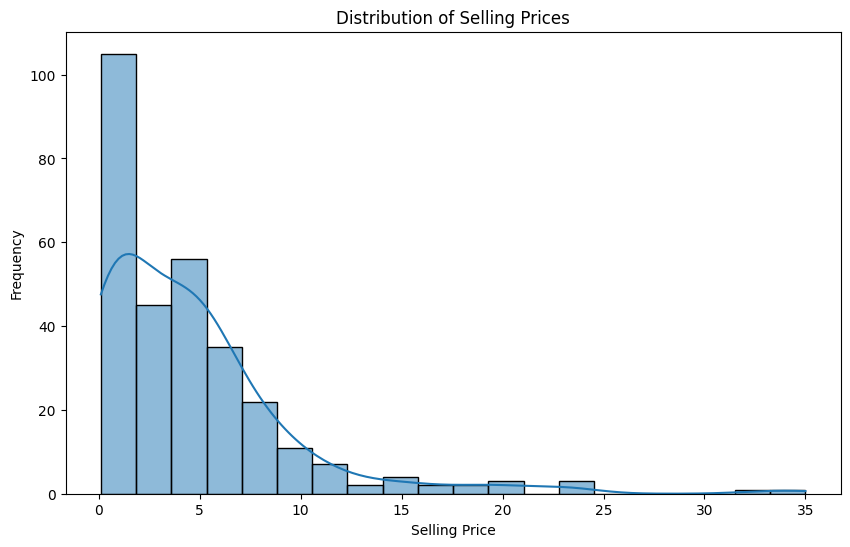

In [ ]:
# Univariate analysis
# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

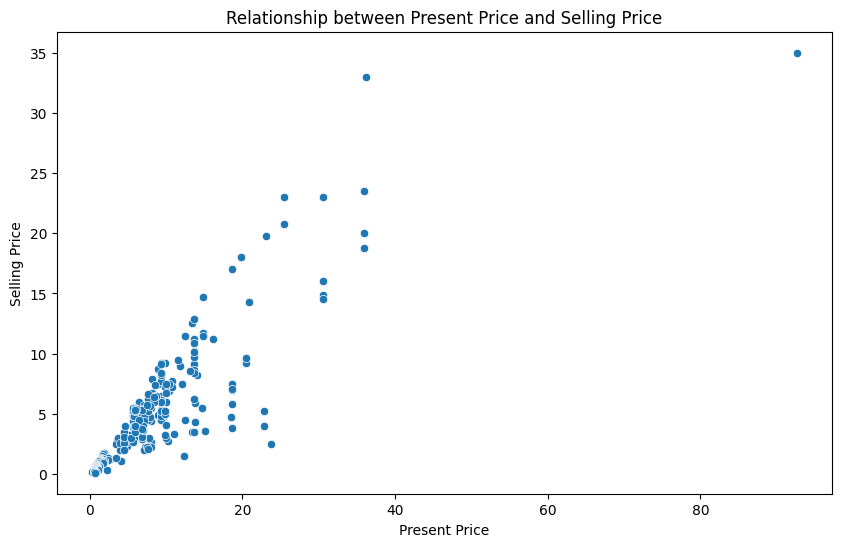

In [ ]:
# Bivariate analysis
# Relationship between Selling_Price and Present_Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Present Price and Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

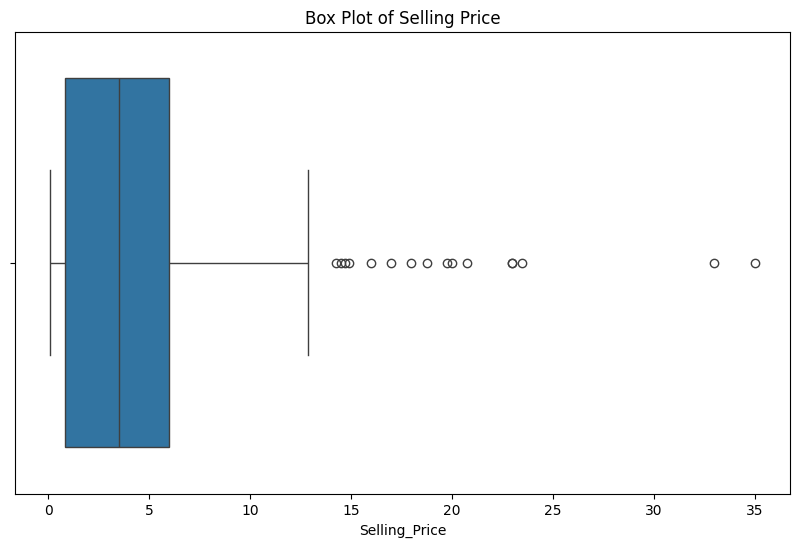

In [ ]:
# Outlier detection
# Box plot of Selling_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Selling_Price', data=df)
plt.title('Box Plot of Selling Price')
plt.show()

Getting Insights

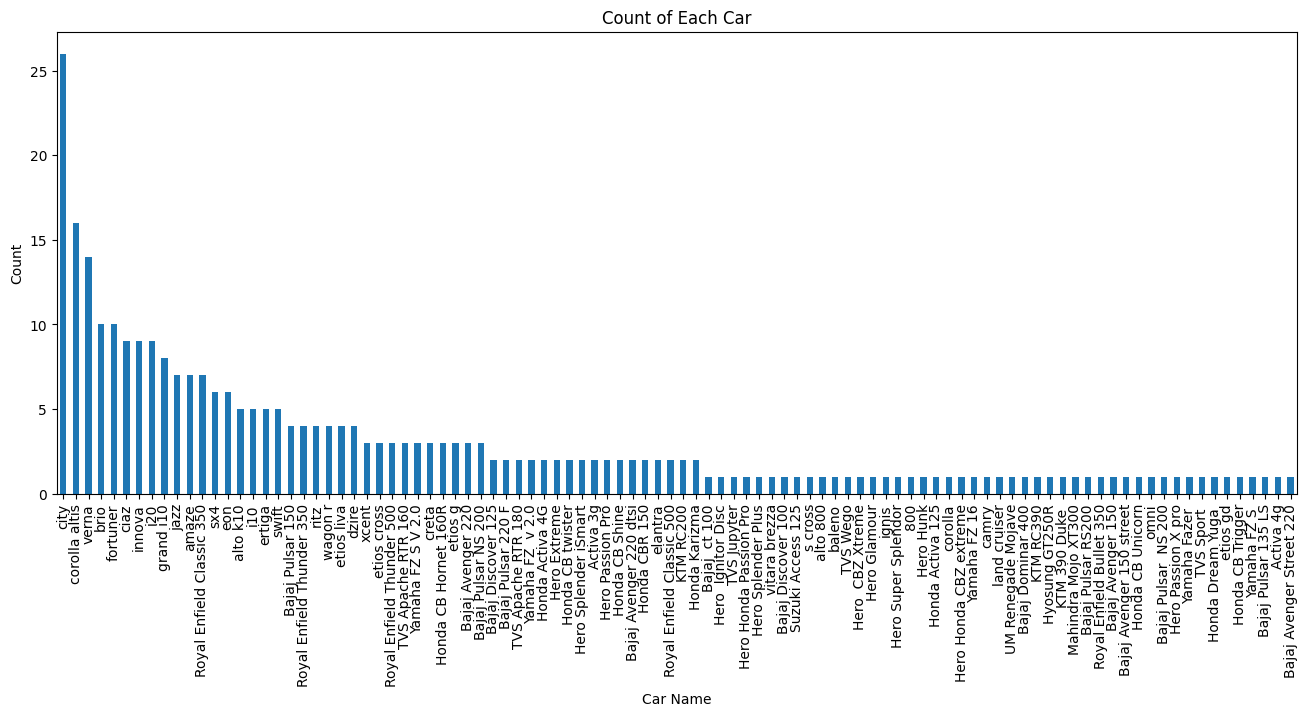

In [ ]:
# Plotting the count of each car under Car_Name
car_count = df['Car_Name'].value_counts()

# Plot the bar plot
plt.figure(figsize=(16, 6))
car_count.plot(kind='bar')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Count of Each Car')
plt.xticks(rotation=90)
plt.show()

# **Data Preprocessing**





In [ ]:
X = df.drop('Selling_Price', axis=1)  # Features
y = df['Selling_Price']  # Target variable

# Separate features (X) and target variable (y)
#X = df.drop([['Selling_Price', 'Present_Price', axis=1]])  # Features
#y = df['Selling_Price']  # Target variable

In [ ]:
# Select the relevant features
features = ['Present_Price', 'Kms_Driven', 'Year', 'Fuel_Type', 'Transmission', 'Owner']

In [ ]:
# One-hot encode categorical variables
categorical_cols = ['Fuel_Type', 'Transmission']
numerical_cols = ['Present_Price', 'Kms_Driven', 'Year', 'Owner']

In [ ]:
# Create one-hot encoding object
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Fit and transform categorical data
X_categorical = encoder.fit_transform(df[categorical_cols])


In [ ]:
# Create a DataFrame with numerical and encoded categorical data
X = pd.DataFrame(df[numerical_cols].values, columns=numerical_cols, index=df.index)
X = pd.concat([X, pd.DataFrame(X_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_cols), index=df.index)], axis=1)

In [ ]:
# Target variable
y = df['Selling_Price']

# Splitting  Data into Training and Testing Sets

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfr = LinearRegression()

In [ ]:
# Initialize Random Forest Regressor
rf_regressor = LinearRegression()

In [ ]:
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Create and train the Random Forest Regression model
rf_model = LinearRegression()
rf_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_train_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate model performance
# Evaluate model performance
print('R-squared score:', r2_score(y_train_pred, y_test))
print('Mean Squared Error:', mean_squared_error(y_train_pred, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_train_pred, y_test))

R-squared score: 0.6179055235721633
Mean Squared Error: 6.264794933878116
Mean Absolute Error: 1.5697119329563414


## **Finding the best parameter for the model**

In [ ]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'copy_X': [True, False],         # Whether to copy the input data before fitting the model
}


In [ ]:
# Initialize Linear Regression
rf_regressor = LinearRegression()

In [ ]:
# Instantiate GridSearchCV
rf_cv = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)


In [ ]:
# Fit GridSearchCV
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
y_pred = rf_cv.predict(X_test)

In [ ]:
print('R-squared score:', r2_score(y_pred, y_test))
print('Mean Squared Error:', mean_squared_error(y_pred, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_pred, y_test))

R-squared score: 0.6179055235721633
Mean Squared Error: 6.264794933878116
Mean Absolute Error: 1.5697119329563414


In [ ]:
# Print the best parameters and the accuracy of the model using these parameters
print("Best parameters found: ", rf_cv.best_params_)

Best parameters found:  {'copy_X': True, 'fit_intercept': True}


# After Fitting our Model, Testing to see its Predictions

In [ ]:
# Evaluating the Model
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

     Actual  Predicted
283    8.99   7.180781
267    8.35   7.569699
166    0.45   1.977209
9      7.45   6.804768
78     5.25  11.018400
280    5.25   4.016137
95     5.85   8.434330
111    1.15   2.361309
5      9.25   8.626975
175    0.38  -0.292697
99     9.65  10.344115
197    0.16  -0.451230
186    0.25   1.030807
156    0.48   2.212528
58     4.10   4.273371
61     4.50   4.653076
149    0.51   1.978655
110    1.20   2.513653
64    33.00  21.986223
142    0.60   1.532847
157    0.48   1.580098
106    1.35   2.886091
249    5.25   5.151640
47     1.05  -0.437652
43     5.50   6.015666
277    9.70   7.563261
282    8.25   8.660847
118    1.10   1.851405
215    4.50   4.405418
238    4.80   4.574919
18     3.25   3.262055
241    4.75   4.815977
34     5.50   6.021809
25     3.00   2.108064
46     2.65   2.429783
7      6.50   6.730031
115    1.11   1.918345
196    0.17  -3.452803
113    1.15   2.107375
94     4.00  10.204881
76     5.50   6.954130
83    12.50   8.964546
120    1.05

In [ ]:
#y_test - model_pred2

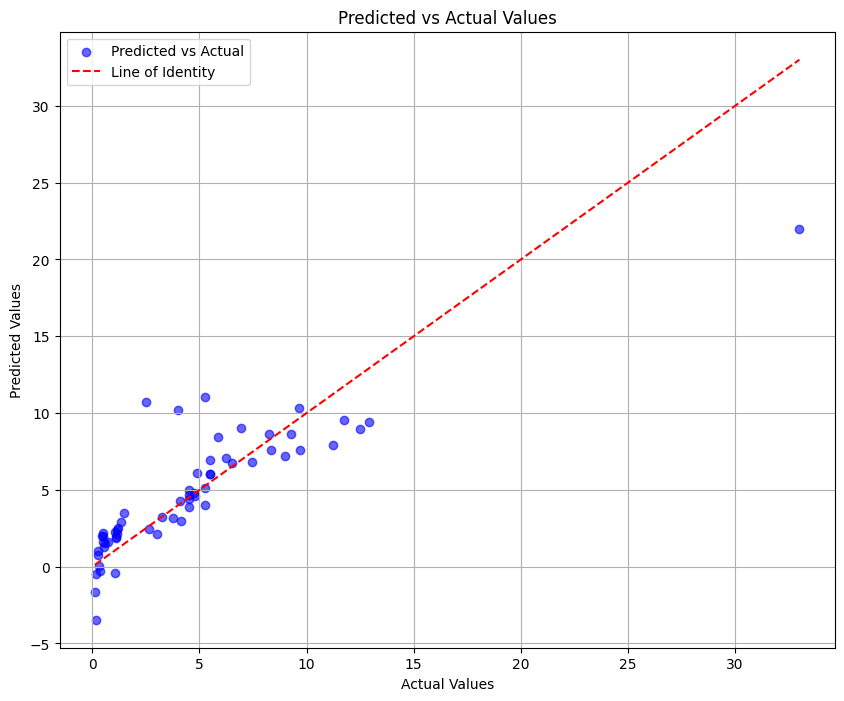

In [ ]:
# Creating the Predicted vs Actual plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')  # Plot actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Line of Identity')  # Line of perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

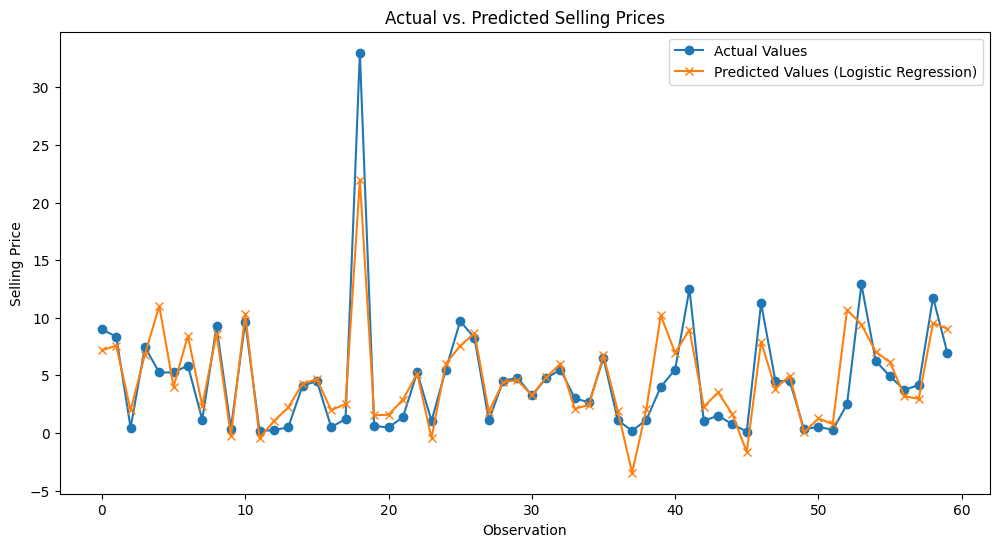

In [ ]:
# Create a line plot to visualize actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Values (Logistic Regression)', marker='x')
plt.xlabel('Observation')
plt.ylabel('Selling Price')
plt.title('Actual vs. Predicted Selling Prices')
plt.legend()